# Red Neuronal MLP

**Importación y Preprocesamiento:**

Se importan las librerías necesarias para el manejo de datos, visualización y construcción de la red neuronal.
Se genera un conjunto de datos sintético con make_moons y se divide en entrenamiento y prueba.
Se grafica el dataset para entender cómo se distribuyen las clases

**Construcción del Modelo:**

La función build_model crea una red neuronal simple con una capa oculta de 16 neuronas y una capa de salida con activación sigmoide.
Se puede aplicar un regularizador a cada capa (L1, L2 o ElasticNet) pasando el objeto adecuado.
Si se especifica un valor para dropout_rate mayor a cero, se añade una capa de Dropout

**Entrenamiento:**

Cada modelo se entrena durante 100 épocas usando el optimizador Adam, que realiza el forward propagation y backpropagation internamente.
Se usa un tamaño de batch de 32 y se reserva el 10% de los datos de entrenamiento para validación

**Evaluación y Visualización**:

Se evalúa cada modelo sobre el conjunto de prueba y se muestran la pérdida y la precisión

Se grafican la evolución de la precisión y la pérdida a lo largo de las épocas para cada técnica de regularización

**Comparación y Conclusión:**

Se imprimen los resultados de cada modelo y se explica en qué consiste cada técnica de regularización, cuándo es útil y qué efectos se observan

# Importamos las librerías necesarias

In [30]:
import numpy as np                           # Para operaciones numéricas
import matplotlib.pyplot as plt              # Para graficar resultados
from sklearn.datasets import make_moons       # Para generar un dataset sintético (dos lunas)
from sklearn.model_selection import train_test_split  # Para dividir el dataset en entrenamiento y prueba
import tensorflow as tf                      # Framework para deep learning
from tensorflow.keras.models import Sequential  # Modelo secuencial de Keras
from tensorflow.keras.layers import Dense, Dropout  # Capas densas y de dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2  # Regularizadores L1, L2 y combinación (Elastic Net)
from tensorflow.keras.utils import plot_model # visualizar redes

**import numpy as np**

Para realizar operaciones matemáticas y manipular matrices/arreglos numéricos

**import matplotlib.pyplot as plt**

Para graficar datos y visualizar los resultados

**from sklearn.datasets import make_moons**

Genera un conjunto de datos sintético con dos clases en forma de lunas entrelazadas

- **Parámetros importantes:**
  - n_samples: Número de puntos de datos (por defecto 100)
  - noise: Nivel de ruido aleatorio (por defecto 0.1)
  - random_state: Fija la semilla para reproducibilidad

**from sklearn.model_selection import train_test_split**

Divide los datos en conjuntos de entrenamiento y prueba

- **Parámetros importantes:**
  - test_size: Proporción de datos para prueba (ej. 0.2 significa 20% prueba, 80% entrenamiento)
  - random_state: Fija la semilla para hacer la división reproducible
  - shuffle: Si True, mezcla los datos antes de dividir

**import tensorflow as tf**

Importa TensorFlow, un framework para deep learning


**from tensorflow.keras.models import Sequential**

Modelo secuencial de Keras, donde las capas se agregan en orden

**from tensorflow.keras.layers import Dense, Dropout**

- Dense: Capa completamente conectada (cada neurona conecta con todas las de la capa anterior/siguiente).
- Dropout: Capa para desactivar un porcentaje de neuronas aleatoriamente en cada iteración para evitar sobreajuste.
  - Parámetro importante en Dropout:
    - rate: Proporción de neuronas a desactivar (ej. 0.2 significa 20% de las neuronas se apagan en cada iteración)

**from tensorflow.keras.regularizers import l1, l2, l1_l2**

- **Regularizadores para reducir el sobreajuste:**
  - l1(lambd): Penaliza pesos grandes sumando la norma L1 (valor absoluto de los pesos)
  - l2(lambd): Penaliza pesos grandes sumando la norma L2 (cuadrado de los pesos)
  - l1_l2(l1=lambd1, l2=lambd2): Combinación de L1 y L2 (Elastic Net)

**¿Qué pasa si cambiamos parámetros?**
- Aumentar noise en make_moons : Datos más dispersos y difíciles de separar.
- Cambiar test_size en train_test_split : Menos/más datos para entrenamiento o prueba
- Aumentar Dropout : Más regularización, pero podría reducir la capacidad de aprendizaje si es muy alto
- Usar l1, l2 o l1_l2 : Menos sobreajuste, pero podría dificultar el aprendizaje si la penalización es muy fuerte

# Generamos un dataset sintético

In [31]:
X, y = make_moons(n_samples=1000, noise=0.5, random_state=42)


genera un conjunto de datos sintético con forma de dos lunas entrelazadas.

**Parámetros:**
- n_samples=1000

Cantidad de puntos de datos generados

Alternativa: Puedes reducir o aumentar el número de muestras (n_samples=500, n_samples=2000)

Efecto: Más datos pueden mejorar el aprendizaje del modelo, pero aumentan el tiempo de entrenamiento

- noise=0.2

Agrega ruido aleatorio a los datos para que no sean perfectamente separables.
Alternativa: noise=0 genera datos perfectamente alineados en la forma de luna, noise=0.5 hace que los datos se dispersen más

Efecto: Más ruido dificulta la clasificación, pero puede mejorar la generalización del modelo

- random_state=42

Fija una semilla para que los datos generados sean siempre los mismos

Alternativa: Cambiar el número (random_state=10, random_state=None) genera un conjunto de datos diferente

Efecto: Cambiarlo puede dar resultados diferentes en cada ejecución

# Dividimos el dataset para Entrenamiento

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Divide el conjunto de datos en entrenamiento y prueba.

**Parámetros:**

- X y Y

X: Contiene las coordenadas [x, y] de los puntos generados
y: Contiene las etiquetas 0 o 1 que indican a qué luna pertenece cada punto

- test_size=0.2

Indica qué porcentaje de los datos se usa para prueba (20% en este caso)

Alternativa: test_size=0.1 (10% prueba, 90% entrenamiento) o test_size=0.3 (30% prueba, 70% entrenamiento)

Efecto: Un test_size más alto reduce los datos de entrenamiento, lo que puede afectar el aprendizaje del modelo

- random_state=42

Fija la semilla para que la división de datos sea siempre la misma

Alternativa: Cambiar el número (random_state=10, random_state=None) generará una división diferente en cada ejecución

Efecto: Si None, la división será aleatoria cada vez

# Viusalizamos el dataset

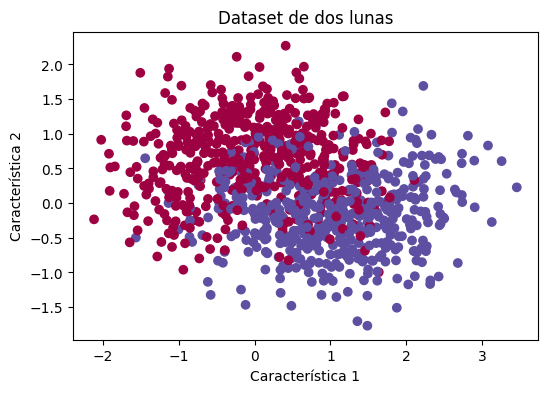

In [33]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.title('Dataset de dos lunas')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**plt.figure(figsize=(6,4))**

Crea una figura de tamaño 6x4 pulgadas

Alternativa: Puedes cambiar el tamaño, por ejemplo, figsize=(8,6)

Efecto: Un tamaño mayor puede hacer que los puntos sean más fáciles de distinguir

**plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)**

Dibuja un gráfico de dispersión con las coordenadas del dataset

- **Parámetros:**
  - X[:,0]: Valores en el eje X (primera característica)
  - X[:,1]: Valores en el eje Y (segunda característica)
  - c=y: Colorea los puntos según su clase (0 o 1)
  - cmap=plt.cm.Spectral: Usa un mapa de colores para diferenciar las clases
- Alternativa:
Cambiar cmap, por ejemplo, cmap='coolwarm' o cmap='viridis'

- Efecto: Puede cambiar la visualización de las clases para mejor interpretación

**plt.title('Dataset de dos lunas')**

Agrega un título al gráfico

**plt.xlabel('Característica 1')**

Etiqueta para el eje X

**plt.ylabel('Característica 2')**

Etiqueta para el eje Y

**plt.show()**

Muestra el gráfico.

# Creamos una funcion para crear la red neuronal y construir el modelo

In [34]:
# Definimos una función que se va a encargar de crear o constuir el modelo neuronal
# esta va a permitir ver si se le aplica regularizacion o dropout
def build_model(regularizer=None, dropout_rate=0.0):

    model = Sequential()  # Inicializamos el modelo secuencial

    # Primera capa densa (oculta):
    model.add(Dense(16, input_shape=(2,), activation='relu', kernel_regularizer=regularizer))

    # Si se ha especificado un valor de dropout (mayor que 0) se añade una capa Dropout.
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Capa de salida:
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizer))

    #compliamos el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

Define una función para crear un modelo neuronal configurable con regularización y dropout

**model = Sequential()**

Se inicializa un modelo secuencial en Keras

**model.add(Dense(16, input_shape=(2,), activation='relu', kernel_regularizer=regularizer))**

- Crea la primera capa oculta con:
16 neuronas

- Entrada de tamaño (2,) porque los datos tienen 2 características (X[:,0] y X[:,1])

- Función de activación relu para hacer la red no lineal

- Regularización kernel_regularizer=regularizer (si la pasamos)

- Si regularizer=None, no se aplica ninguna regularización

**if dropout_rate > 0:**

- Si el valor de dropout_rate es mayor que 0, se agrega una capa Dropout para reducir el sobreajuste

**model.add(Dropout(dropout_rate))**

Desactiva aleatoriamente dropout_rate% de las neuronas en cada iteración

**model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizer))**

Capa de salida con:

- 1 neurona (porque es un problema de clasificación binaria)
- Activación sigmoid para producir una salida entre 0 y 1

**model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])**

Compila el modelo con:
- Optimizador adam, que ajusta los pesos eficientemente

- Función de pérdida binary_crossentropy, adecuada para clasificación binaria
- Métrica accuracy para evaluar el rendimiento

**¿Qué pasa si cambiamos parámetros?**

- Aumentar las neuronas en la capa oculta (Dense(32, ...))
: Puede mejorar la capacidad del modelo, pero aumenta el riesgo de sobreajuste

- Cambiar activation='relu' por activation='tanh'
: tanh puede funcionar mejor si los datos están bien distribuidos en torno a 0

- Usar Dropout(0.5) en lugar de Dropout(0.2)
: Más dropout puede reducir el sobreajuste, pero si es demasiado, puede afectar el aprendizaje

- Usar kernel_regularizer=l2(0.01) en todas las capas
: Ayuda a prevenir sobreajuste penalizando valores grandes en los pesos

**Opciones para el Optimizador (optimizer)**

El optimizador es el algoritmo que ajusta los pesos del modelo durante el entrenamiento. Algunos de los más comunes en Keras son:

- adam (Usado en tu código)

Es una combinación de RMSprop y Momentum, adaptándose dinámicamente a la tasa de aprendizaje

Si lo cambias por otro:

- sgd: Puede necesitar más ajustes para converger bien
- adamax: Variante de adam más estable con grandes valores de gradiente
- nadam: Variante de adam con aceleración de Nesterov, puede converger más rápido en algunos casos

- sgd (Gradiente Descendente Estocástico)

Actualiza los pesos en cada iteración basándose en un subconjunto de datos

Efecto del cambio:
Funciona bien en datasets grandes

Requiere ajustar manualmente la tasa de aprendizaje (learning_rate)

Puede ser más lento para converger

- rmsprop (Root Mean Square Propagation)

Se adapta a diferentes escalas de gradientes

Efecto del cambio:
Funciona bien en problemas donde adam no converge

Es útil en redes profundas

- adamax (Variante de adam)

Es más estable con valores de gradiente grandes

Efecto del cambio:
Puede mejorar la estabilidad en redes con valores extremos en los pesos

- nadam (Nesterov-accelerated Adaptive Moment Estimation)

Es similar a adam pero con una aceleración Nesterov

Efecto del cambio:
Puede converger más rápido en algunos casos

**Opciones para la Función de Pérdida (loss)**

La función de pérdida mide qué tan lejos están las predicciones de los valores reales


- binary_crossentropy (Usada en tu código)

Se usa en problemas de clasificación binaria (0 o 1)

Si la cambias por otro:
- mse: No es recomendable para clasificación, ya que castiga menos los errores grandes
- hinge: Funciona para SVM pero no para redes neuronales estándar

- categorical_crossentropy

Se usa para clasificación multiclase con one-hot encoding
Efecto del cambio:
Requiere que y sea un vector one-hot ([0, 1, 0] en lugar de 1 o 0)

No es adecuada para clasificación binaria

- sparse_categorical_crossentropy

Similar a categorical_crossentropy pero acepta etiquetas enteras (0, 1, 2... en lugar de one-hot encoding)

Efecto del cambio:
Útil si tienes varias clases y etiquetas en formato numérico en lugar de one-hot

- mse (Mean Squared Error)

Se usa para problemas de regresión en lugar de clasificación

Efecto del cambio:
No es adecuada para clasificación binaria porque no maneja bien probabilidades

- hinge

Se usa en modelos basados en SVM para clasificación

Efecto del cambio:
Puede funcionar peor que binary_crossentropy en redes neuronales



# Creamos un diccionario para guardar los modelos y sus entrenamientos

In [35]:
models = {}         # Almacenará cada modelo
history_dict = {}   # Almacenará el historial (loss y accuracy por época) de cada modelo

# Creamos una red o bien modelo base sin regularizacion ni Dropout

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


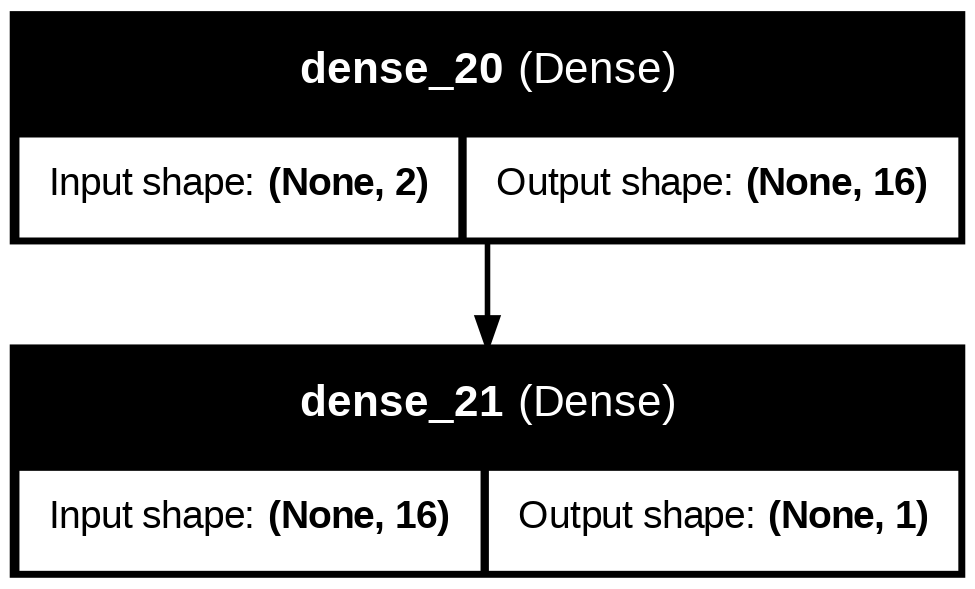

In [36]:
# MODELO BASE: Sin ninguna regularización (punto de referencia)
models['Baseline'] = build_model(regularizer=None, dropout_rate=0.0)
plot_model(models['Baseline'], show_shapes=True, show_layer_names=True)

# Creamos una red o bien modelo base con regularizacion L1 pero sin Dropout

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


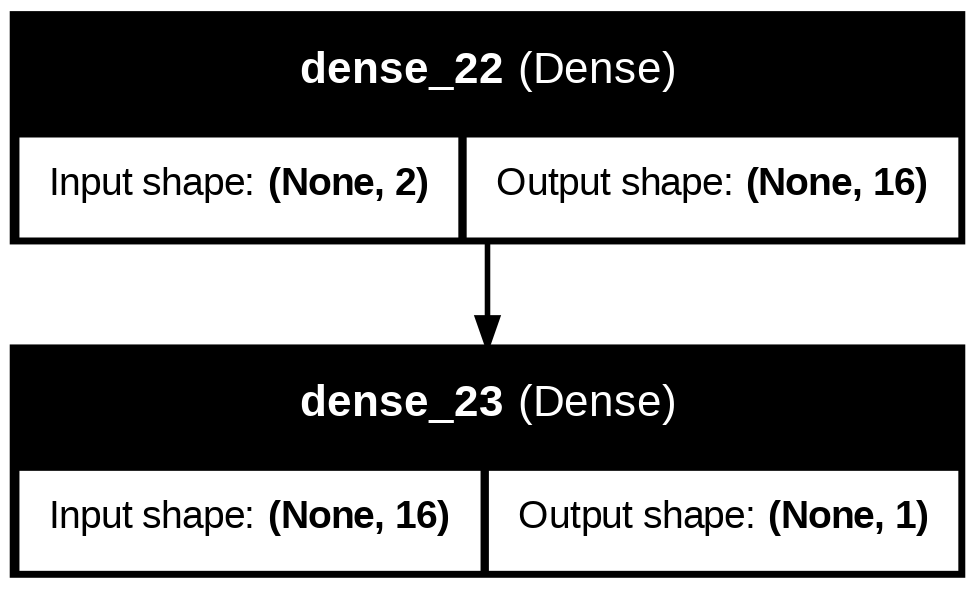

In [37]:
# MODELO CON REGULARIZACIÓN L1:
# L1 penaliza la suma absoluta de los pesos, lo que tiende a hacer que algunos pesos se vuelvan exactamente cero,
# ayudando en la selección de características.
models['L1'] = build_model(regularizer=l1(0.001), dropout_rate=0.0)
# Nota: El valor 0.001 es la "fuerza" de la regularización; si se aumenta, se penalizan más los pesos.

plot_model(models['L1'], show_shapes=True, show_layer_names=True)

# Creamos una red o bien modelo base con regularizacion L2 pero sin Dropout

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


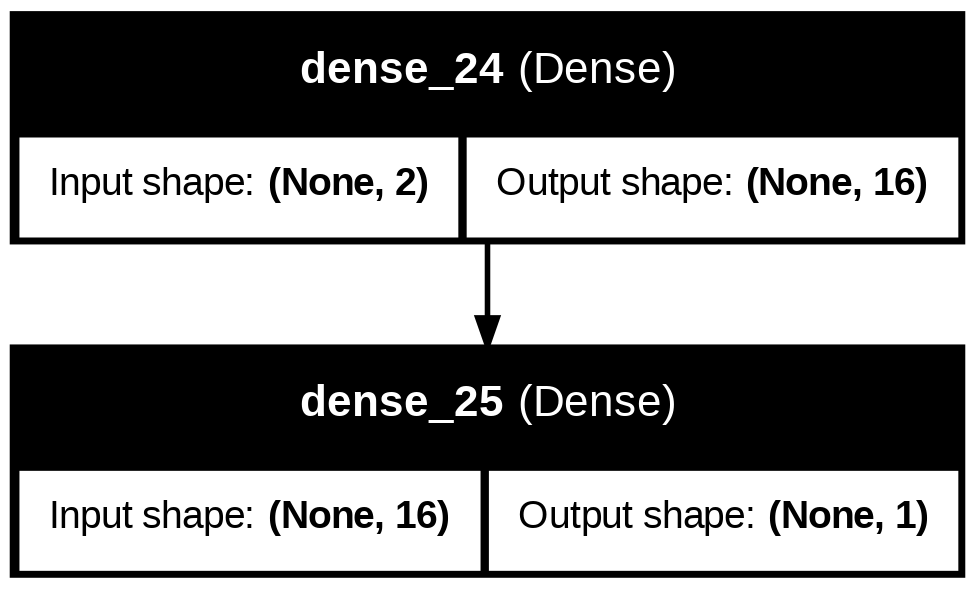

In [38]:
# MODELO CON REGULARIZACIÓN L2:
# L2 penaliza la suma de los cuadrados de los pesos, reduciendo la magnitud de los mismos sin forzarlos a cero.
models['L2'] = build_model(regularizer=l2(0.001), dropout_rate=0.0)

plot_model(models['L2'], show_shapes=True, show_layer_names=True)

# Creamos una red o bien modelo base con regularizacion L1 y L2 pero sin Dropout

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


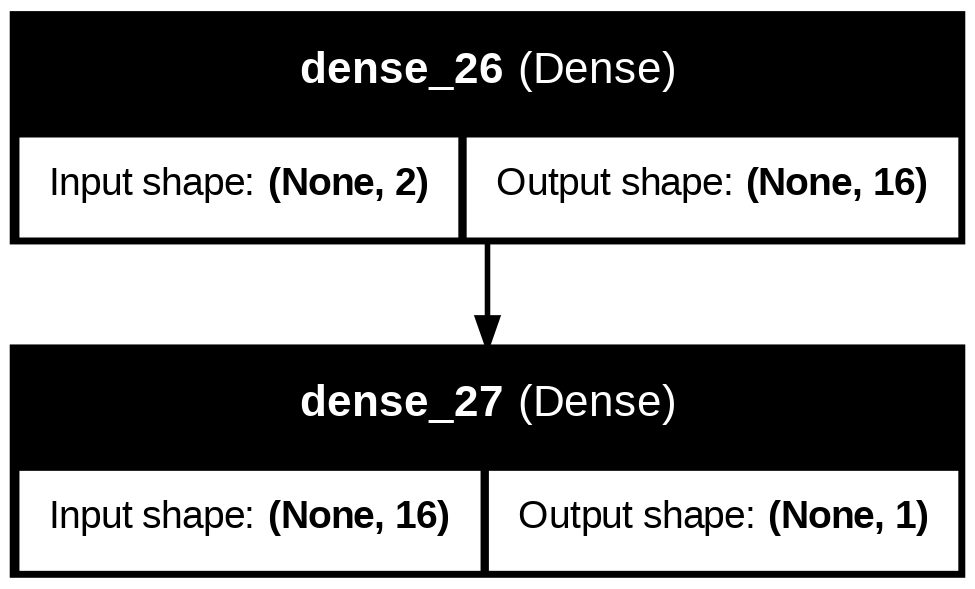

In [39]:
# MODELO CON REGULARIZACIÓN ELASTIC NET:
# Elastic Net combina L1 y L2; se aplica cuando se usan ambos parámetros simultáneamente.
models['ElasticNet'] = build_model(regularizer=l1_l2(l1=0.001, l2=0.001), dropout_rate=0.0)

plot_model(models['ElasticNet'], show_shapes=True, show_layer_names=True)

# Creamos una red o bien modelo base sin regularizacion pero con Dropout

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


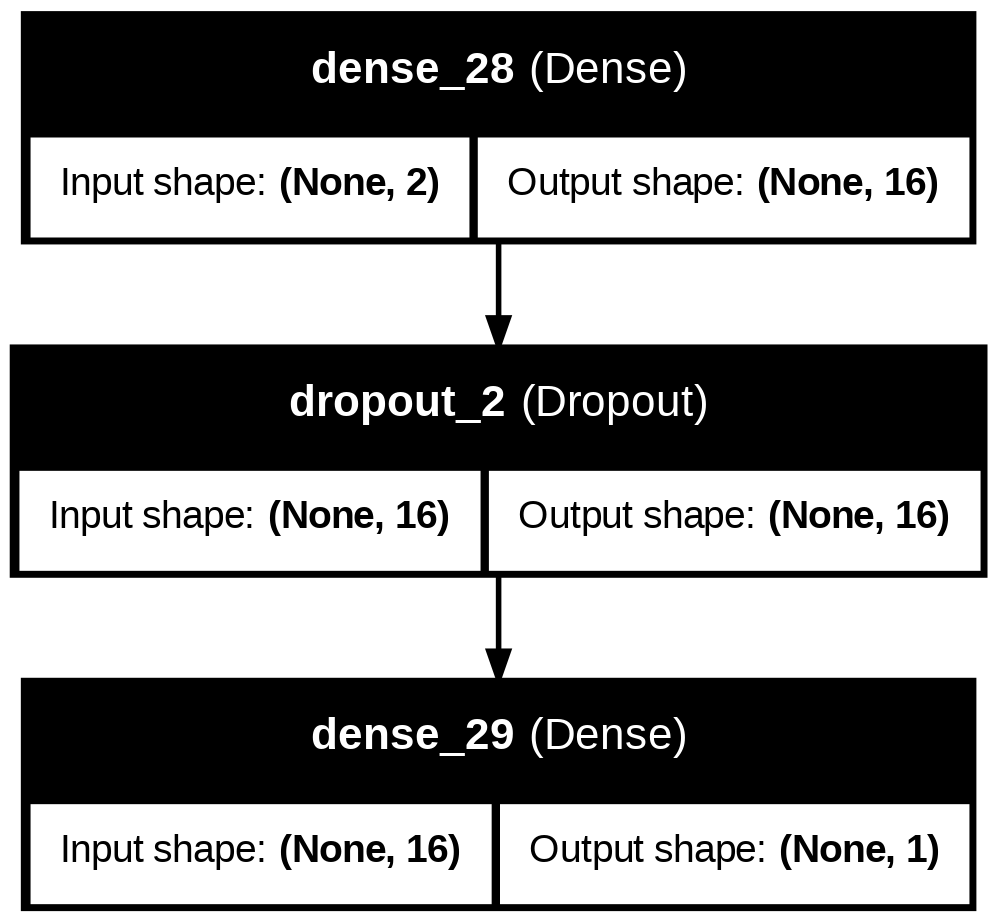

In [40]:
# MODELO CON DROPOUT:
# En este modelo no se aplica regularización en los pesos, pero se usa Dropout para prevenir sobreajuste.
# La tasa de dropout de 0.5 desconecta el 50% de las neuronas aleatoriamente durante el entrenamiento.
models['Dropout'] = build_model(regularizer=None, dropout_rate=0.5)

plot_model(models['Dropout'], show_shapes=True, show_layer_names=True)

# Definimos la cantidad de iteraciones para el entrenamiento

In [41]:
epochs = 100

# Entrenamos cada modelo y almacenamos su historial de entrenamiento

In [42]:

for key in models:
    print(f'Entrenando modelo: {key}')
    history = models[key].fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0, validation_split=0.1)
    history_dict[key] = history  # Guardamos el historial del modelo

Entrenando modelo: Baseline
Entrenando modelo: L1
Entrenando modelo: L2
Entrenando modelo: ElasticNet
Entrenando modelo: Dropout


 **La función fit realiza:**
   - Forward propagation: calcula la salida de la red con los pesos actuales

     - Cálculo de la pérdida (error) mediante la función de pérdida

    - Backpropagation: ajusta los pesos utilizando el gradiente de la pérdida

    - Se usa validation_split=0.1 para separar el 10% del entrenamiento y evaluar durante el entrenamiento

**for key in models:**

Itera sobre cada modelo en el diccionario models

Cada key representa un nombre de modelo (por ejemplo, 'modelo_sin_regularizacion', 'modelo_con_dropout', etc.)

**print(f'Entrenando modelo: {key}')**

Muestra en la consola qué modelo se está entrenando

**history = models[key].fit(...)**

Entrena el modelo con los datos de entrenamiento X_train, y_train

- **Parámetros del método fit:**
  - epochs=epochs → Número de veces que el modelo verá todos los datos

  - batch_size=32 → Usa lotes de 32 muestras para actualizar los pesos

  - verbose=0 → No muestra el progreso del entrenamiento en la consola

  - validation_split=0.1 → Usa el 10% de los datos de entrenamiento como validación

- **Alternativas y efectos:**

  - epochs=200	Entrena por más tiempo, puede mejorar la precisión pero puede dar sobreajuste

  - batch_size=64 : Usa lotes más grandes, lo que puede hacer el entrenamiento más rápido pero menos preciso

  - verbose=1 : Muestra una barra de progreso en la consola

  - validation_split=0.2 : Usa más datos para validación, reduciendo los de entrenamiento

**history_dict[key] = history**

Guarda el historial de entrenamiento del modelo en history_dict

**history.history** contendrá métricas como loss y accuracy





# Evaluamos cada modelo sobre el conjunto de prueba para obtener la pérdida y precisión final

In [43]:
results = {}
for key in models:
    loss, acc = models[key].evaluate(X_test, y_test, verbose=0)
    results[key] = (loss, acc)
    print(f"Modelo {key}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

Modelo Baseline: Loss = 0.4323, Accuracy = 0.8000
Modelo L1: Loss = 0.4551, Accuracy = 0.7950
Modelo L2: Loss = 0.4520, Accuracy = 0.8000
Modelo ElasticNet: Loss = 0.4657, Accuracy = 0.8000
Modelo Dropout: Loss = 0.4392, Accuracy = 0.8000


# Graficamos la evolución de la precisión en el entrenamiento para cada modelo

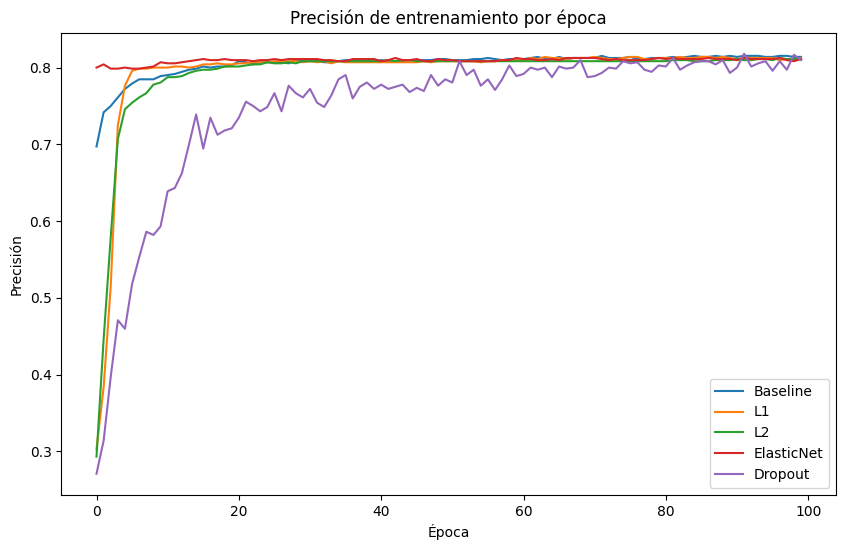

In [44]:
plt.figure(figsize=(10, 6))
for key in history_dict:
    plt.plot(history_dict[key].history['accuracy'], label=key)
plt.title('Precisión de entrenamiento por época')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficamos la evolución de la pérdida en el entrenamiento para cada modelo

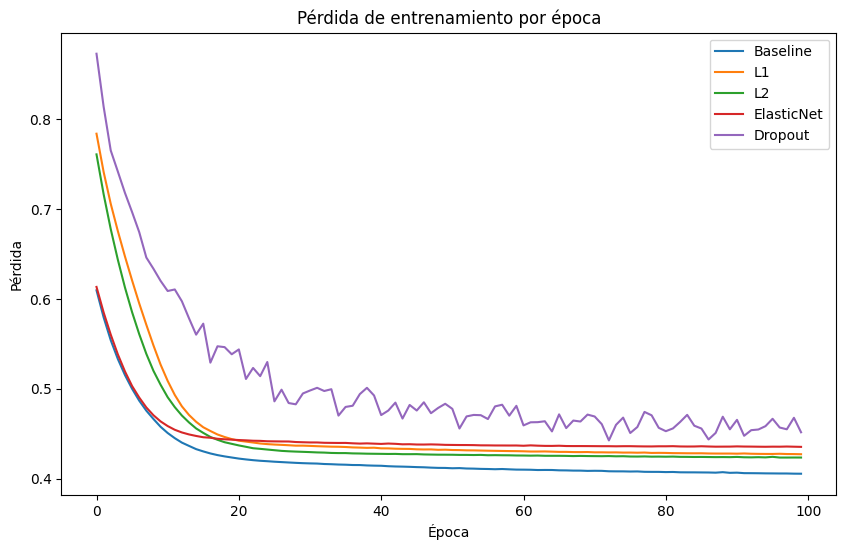

In [45]:
plt.figure(figsize=(10, 6))
for key in history_dict:
    plt.plot(history_dict[key].history['loss'], label=key)
plt.title('Pérdida de entrenamiento por época')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Imprimimos una comparación final entre los modelos

In [46]:
print("Comparación de modelos en el conjunto de prueba:")
for key, (loss, acc) in results.items():
    print(f"Modelo {key}: Pérdida = {loss:.4f}, Precisión = {acc:.4f}")

Comparación de modelos en el conjunto de prueba:
Modelo Baseline: Pérdida = 0.4323, Precisión = 0.8000
Modelo L1: Pérdida = 0.4551, Precisión = 0.7950
Modelo L2: Pérdida = 0.4520, Precisión = 0.8000
Modelo ElasticNet: Pérdida = 0.4657, Precisión = 0.8000
Modelo Dropout: Pérdida = 0.4392, Precisión = 0.8000


Explicación de los resultados:
- Baseline: Es el modelo sin ninguna técnica de regularización y sirve como punto de partida

- L1: Penaliza la suma de los valores absolutos de los pesos, lo que puede hacer que algunos pesos se vuelvan cero

Esto es útil para identificar y eliminar características poco relevantes, pero puede llevar a un modelo más esparso

- L2: Penaliza la suma de los cuadrados de los pesos, reduciendo la magnitud de los mismos sin forzarlos a cero

Generalmente produce un modelo más estable y es la forma de regularización más común

- ElasticNet: Combina L1 y L2, tratando de obtener lo mejor de ambos métodos. Su efectividad depende de la combinación de parámetros y puede mejorar el rendimiento en algunos casos

- Dropout: Desactiva aleatoriamente un porcentaje de neuronas durante el entrenamiento. Esto previene el sobreajuste obligando a la red a aprender representaciones más robustas. Es especialmente útil en redes profundas
      
En muchos casos, la regularización L2 o ElasticNet tienden a ofrecer un buen equilibrio y un rendimiento consistente

Sin embargo, el efecto de cada método depende del conjunto de datos y de la arquitectura del modelo. En redes muy profundas, el dropout puede ser más efectivo, mientras que en modelos más simples, L2 suele funcionar muy bien